# Exercise 3 (week 4)

Part 1: Multi-Class Logistic Regression to categorize handwritten numbers 0-9

Part 2: Make predictions from a Neural Net given Theta parameters

Part 3: Build a regularized Neural Net, based on Logistic Regression and using Gradient Descent as the optimizer

## Import and Visualize the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
#from IPython.core.debugger import Pdb

In [36]:
#import data
# Use loadmat to load matlab files
mat=loadmat("/home/smhaladuick/local/andrew_ng/ex3/ex3data1.mat")
X=mat["X"]
y=mat["y"]

In [3]:
np.shape(y)

(5000, 1)

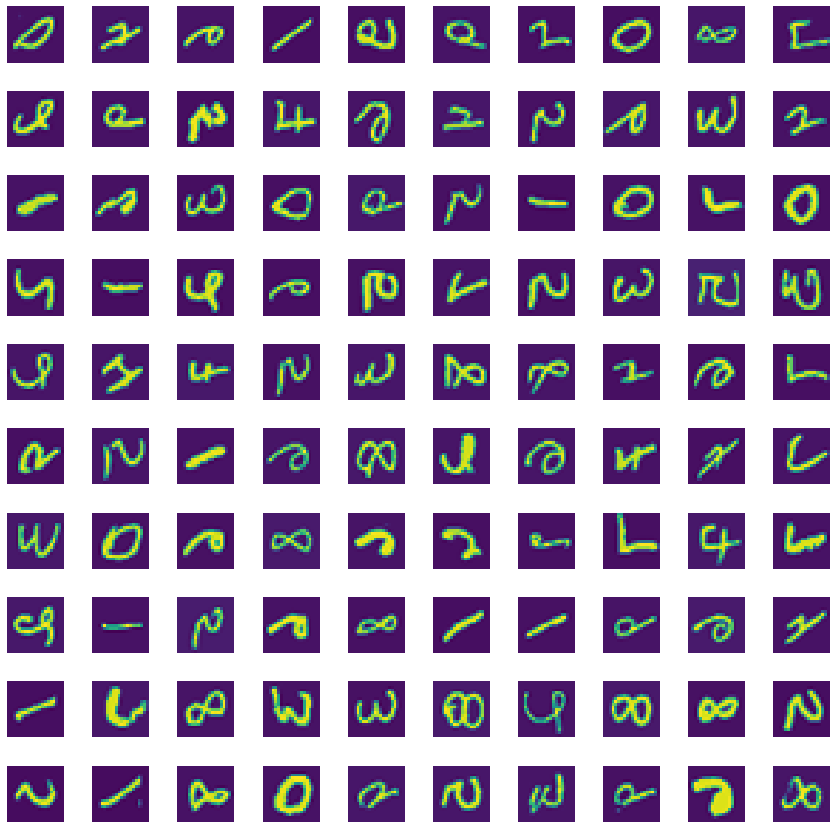

In [39]:
#visualize the X data image files
import matplotlib.image as mpimg
import random

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
for i in range(10):
    for j in range(10):
        rand = np.random.randint(0, 4999)
        ax[i,j].imshow(np.array(X[rand,:]).reshape(20,20))
        ax[i,j].axis("off")

In [5]:
#function to compute the sigmoid
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [6]:
#function to compute the cost J and gradient grad
def lrCostFunction(theta, X, y, Lambda):
    #DIMENSIONS: 
    #theta = (n+1) x 1
    #X     = m x (n+1)
    #y     = m x 1
    #grad  = (n+1) x 1
    #J     = Scalar

    # Initialize variables
    m = len(y)  # number of training examples

    predictions = sigmoid(np.dot(X, theta))
    error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))

    temp_theta = np.copy(theta)
    temp_theta[0] = 0 #don't regularize for the theta_0 term

    J = (1/m) * np.sum(error) + (Lambda / (2 * m)) * np.sum(temp_theta **2)
    grad = (1/m) * np.dot(X.T, (predictions - y)) + ((Lambda / m) * temp_theta) 
    
    return J, grad

In [7]:
# Performs gradient descent
def gradientDescentReg(X, y, alpha, numIts, Lambda):
    
    #initialize
    m, n = np.shape(X)[0], np.shape(X)[1] -1 #num data points and num features
    J_hist = []
    theta = np.zeros((n+1,1))

    #loop for each graient descent iteration
    for i in range(numIts):
        # run cost function
        J, grad = lrCostFunction(theta, X, y, Lambda)
        J_hist.append(J) #store J history

        #compute theta
        theta = theta - (alpha * grad)
    
    return J_hist, theta

In [8]:
# Feature Normalization
def FeatureNormalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std<=0.00001] = 1
    X = (X - mean) / std
    return X, mean, std

In [9]:
def oneVsAll(X, y, alpha, numIts, Lambda, num_labels):
    #each column is a J_hist and theta for each class label
    
    J_hist_M = []
    theta_M = []

    for i in range(1, num_labels+1):
        J_hist = []
        theta = []
        J_hist, theta = gradientDescentReg(X, np.where(y==i,1,0), alpha, numIts, Lambda)
        
        J_hist_M.append(J_hist)
        theta_M.append(theta)
        #Pdb().set_trace()
    
    return J_hist_M, theta_M

In [10]:
def predictOneVsAll(theta_M, X):
    #DIMENSIONS: 
    #theta = (n+1) x 1
    #X = m x (n+1)

    predictions_M =[]
    k = np.size(theta_M, 0)

    for i in range(k):
        predictions = sigmoid(np.dot(X, theta_M[i,:]))
        predictions_M.append(predictions)

    predictions_V = np.argmax(predictions_M, axis=0) +1

    return predictions_V

In [11]:
mat=loadmat("/home/smhaladuick/local/andrew_ng/ex3/ex3data1.mat")
X=mat["X"]
y=mat["y"]
m, n = np.shape(X)[0], np.shape(X)[1] #num data points and num features
std = np.std(X, axis=0)
X_norm, X_mean, X_std = FeatureNormalization(X)
X_norm = np.append(np.ones((m,1)), X_norm, axis=1) #add zero column to front of X
X = np.append(np.ones((m,1)), X, axis=1) #add zero column to front of X

In [12]:
#J, grad = lrCostFunction(theta, X, y, Lambda=100)
#J, grad
J_hist_M, theta_M = oneVsAll(X_norm, y, alpha=0.1, numIts=500, Lambda=1, num_labels=10)
J_hist_M = np.squeeze(J_hist_M)
theta_M = np.squeeze(theta_M)

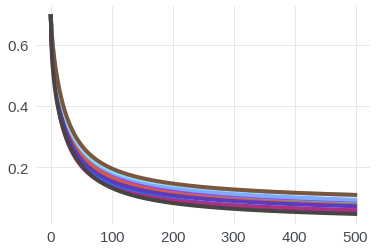

In [13]:
for i in range(10):
    plt.plot(J_hist_M[i,:])

In [14]:
predict_V = predictOneVsAll(theta_M, X_norm).reshape(m,1)

In [15]:
100 * sum(predict_V == y) / m

array([91.76])

/mnt/xarfuse/uid-116465/d8c408cc-seed-nspid4026531836_cgpid12108517-ns-4026531840/matplotlib/text.py:1150: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



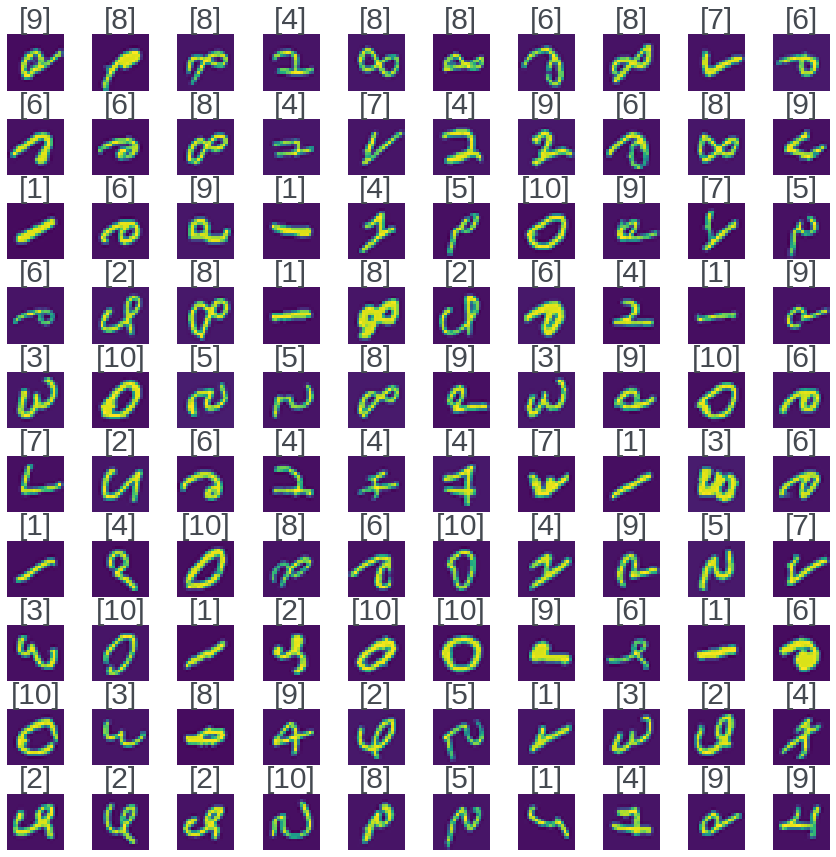

In [16]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
for i in range(10):
    for j in range(10):
        rand = np.random.randint(0, 4999)
        ax[i,j].imshow(np.array(X[rand,1:]).reshape(20,20))
        ax[i,j].title.set_text(predict_V[rand])
        ax[i,j].axis("off")
        

## Part 2: Neural Network Prediction
With the same dataset, we aimed to achieve higher accuracy using a more complex algorithm such as the neural network. For the first part of the exercise, the optimized theta values were given to us and we are supposed to implement feedforward propagation to obtain the prediction and model accuracy.

First step, make predictions from a Neural Net given Theta parameters

Note on Matrix Multiplication (dot product)
Num of columns of first matrix must equal num rows of second matrix
Result will then have num rows of first matrixs and num cols of second matrix
e.g. [MxN] dot [NxM] == [MxN]

In [686]:
#load data
mat2=loadmat("/home/smhaladuick/local/andrew_ng/ex3/ex3weights.mat")
Theta1=mat2["Theta1"] # Theta1 has size 25 x 401
Theta2=mat2["Theta2"] # Theta2 has size 10 x 26

In [175]:
def predictNN(Theta1, Theta2, X):
    #DIMENSIONS: 
    #Theta1 = 25 nodes x 401 layer 1 activation features
    #Theta2 = 10 nodes x 26 layer 2 activation features
    #X = m datapoints x 401 layer 1 activation features

    #initialize
    A0 = np.copy(X)

    A1 = sigmoid(np.dot(A0, Theta1.T)) #A1 is 5000 x 25
    m1 = np.size(A1,0)
    A1 = np.append(np.ones((m1,1)), A1, axis=1) #A1 is 5000 x 26
    A2 = sigmoid(np.dot(A1, Theta2.T)) #[5000 x 26] x [26 x 10] => A2 which is [5000 x 10]

    predictions = np.argmax(A2, axis=1) +1
    
    return predictions

In [255]:
mat=loadmat("/home/smhaladuick/local/andrew_ng/ex3/ex3data1.mat")
X=mat["X"]
y=mat["y"]
m, n = np.shape(X)[0], np.shape(X)[1] #num data points and num features
std = np.std(X, axis=0)
X_norm, X_mean, X_std = FeatureNormalization(X)
X_norm = np.append(np.ones((m,1)), X_norm, axis=1) #add zero column to front of X
X = np.append(np.ones((m,1)), X, axis=1) #add zero column to front of X

In [257]:
predictions = predictNN(Theta1, Theta2, X).reshape(m,1)
#Accuracy
100* sum(predictions==y) / 5000

array([97.52])

## Build the Neural Network

In [965]:
def nnCostFunction(Theta1, Theta2, input_layer_size, hidden_layer_size, num_labels, A0, y, Lambda):
    #DIMS
    #X [5000 X 401]
    #Theta1 [25 X 401]
    #Theta2 [10 X 26]

    # INITIALIZE variables
    m = len(y)  # number of training examples

    #CREATE y_repeated, a [5000 X 10] with 1 column for each class of output variable
    y_repeated = np.zeros((m,0),int)
    for j in range(num_labels):
        y_temp = np.where(y==j+1, 1,0)
        y_repeated = np.concatenate([y_repeated, y_temp], axis=1)

    #FEEDFORWARD to compute the predictions and the cost J
    #A0 is X (input features)
    A1 = sigmoid(A0 @ Theta1.T)  # [5000 X 401] x [25 X 401].T => [5000 X 25]
    A1 = np.concatenate([np.ones((np.size(A1,0),1)), A1], axis=1)  # [5000 X 26]
    A2 = sigmoid(A1 @ Theta2.T)  # [5000 X 26] x [10 X 26].T => [5000 X 10]

    #COMPUTE COST J  
    error = np.sum(-y_repeated * np.log(A2) - (1 - y_repeated) * np.log(1- A2))
    J = (1/m) * error + (Lambda / (2 * m)) * (np.sum(Theta1[:,1:] **2) + np.sum(Theta2[:,1:] **2))

    
    #BACKPROPOGATION to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))
    grad2 = np.zeros((Theta2.shape))
    
    d1 = np.zeros((0,np.shape(Theta2)[1]-1),int)
    d2 = A2 - y_repeated  # [5000 X 10]
    for i in range(m):
        d1_temp = Theta2.T @ d2[i,:].T * (A1[i,:] * (1 - A1[i,:])).T  # [26 X 10] @ [1 X 10].T  * [1 X 26].T
        d1 = np.concatenate([d1, d1_temp[1:].reshape(1, np.size(d1_temp)-1)], axis=0)
    
    grad1 = 1/m * d1.T @ A0  # [5000 X 26].T X [5000 X 401].T => [26 X 401]
    grad2 = 1/m * d2.T @ A1  # [5000 X 10].T X [5000 X 26] => [10 X 26] 

    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)), Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)), Theta2[:,1:]))

    return J, grad1_reg, grad2_reg

In [879]:
# Performs gradient descent
def nnGradientDescent(Theta1, Theta2, input_layer_size, hidden_layer_size, num_labels, A0, y, Lambda, alpha, numIts):
    
    #initialize
    m, n = np.shape(X)[0], np.shape(X)[1] -1 #num data points and num features
    J_hist = []

    #loop for each graient descent iteration
    for i in range(numIts):
        # run cost function
        J, grad1_reg, grad2_reg  = nnCostFunction(Theta1, Theta2, input_layer_size, hidden_layer_size, num_labels, A0, y, Lambda)
        J_hist = np.append(J_hist, J) #store J history

        #compute theta
        Theta1 = Theta1 - (alpha * grad1_reg)
        Theta2 = Theta2 - (alpha * grad2_reg)

    return J_hist, Theta1, Theta2

In [880]:
#randomly initialize theta matrix
def initializeTheta(L_out, L_in):
    e = 6 ** 0.5 / (L_in + L_out) ** 0.5
    Theta = np.random.rand(L_out, L_in) * (2 * e) - e
    return Theta

In [966]:
mat=loadmat("/home/smhaladuick/local/andrew_ng/ex3/ex3data1.mat")
X=mat["X"]
y=mat["y"]
X = np.append(np.ones((m,1)), X, axis=1) #add zero column to front of X

Theta1 = initializeTheta(25, 401)
Theta2 = initializeTheta(10, 26)
J_hist, Theta1, Theta2 = nnGradientDescent(Theta1, Theta2, input_layer_size=25, hidden_layer_size=10, num_labels=10, A0=X, y=y, Lambda=0.1, alpha=2, numIts=400)

In [963]:
J_hist[-1]

0.8913757510534548

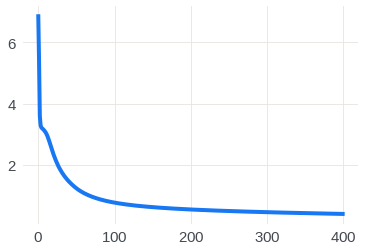

In [967]:
plt.plot(np.squeeze(J_hist))

In [968]:
predictions = predictNN(Theta1, Theta2, X).reshape(m,1)
#Accuracy
100* sum(predictions==y) / 5000

array([95.14])